In [1]:
#задание 2.1.26
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

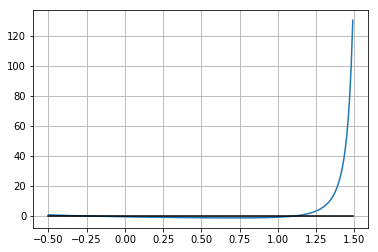

In [2]:
#локализуем корни уравнения f(x)=0 графически
x = np.arange(-0.5, 1.5, 0.01)
y = np.tan(x)**2-(7/4)*np.tan(x)-(1/2)

plt.plot(x,y)
plt.plot(x, x*0, 'k')
plt.grid(True)
plt.show()

In [3]:
#найдем корни уравнения f(x)=0 с точностью ε методом бисекции
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return (np.tan(x))**2-(7/4)*np.tan(x)-(1/2)

def bisec(f,a,b,eps):
    a_n = a
    b_n = b
    k=0
    while (b_n - a_n)/2 > eps:
        x_n = (a_n + b_n) / 2
        if f(a_n) * f(x_n) <= 0:
            b_n = x_n
        else: 
            a_n = x_n
        k += 1
    return (a_n + b_n)/2,k


print('x1 = %.10f, количество итераций = %d'
%bisec(f, -0.5, 0.25, 10**(-10)))
print('x2 = %.10f, количество итераций = %d'
%bisec(f, 0.75, 1.25, 10**(-10)))

x1 = -0.2449786632, количество итераций = 32
x2 = 1.1071487178, количество итераций = 32


In [4]:
#найдём корни уравнения с точностью ε,используя функцию root
root = optimize.root(f, [-0.5,1.5]).x.tolist()
print('x1 = %.10f' %(float(root[0])))
print('x2 = %.10f' %(float(root[1])))

x1 = -0.2449786632
x2 = 1.1071487178


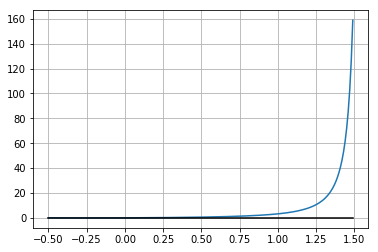

In [5]:
#локализуем корни уравнения g(x)=0 графически
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.arange(-0.5, 1.5, 0.01)
y = (np.tan(x))**2+(1/2)*np.tan(x)+(1/16)

plt.plot(x,y)
plt.plot(x, x*0, 'k')
plt.grid(True)
plt.show()

In [6]:
#найдем корни уравнения g(x)=0 с точностью ε методом бисекции
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def g(x):
    return (np.tan(x))**2+(1/2)*np.tan(x)+(1/16)

def bisec(g,a,b,eps):
    a_n = a
    b_n = b
    k=0
    while (b_n - a_n)/2 > eps:
        x_n = (a_n + b_n) / 2
        if g(a_n) * g(x_n) <= 0:
            b_n = x_n
        else: 
            a_n = x_n
        k += 1
    return (a_n + b_n)/2,k


print('x = %.10f, количество итераций = %d'
%bisec(g, -0.5, 1.5, 10**(-10)))

x = 1.4999999999, количество итераций = 34


In [7]:
#найдём корни уравнения с точностью ε, используя функцию root
root = optimize.root(g, [-0.5,1.5]).x.tolist()
print('x = %.10f' %(float(root[0])))

x = -0.2449786650


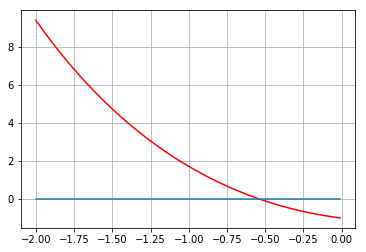

In [4]:
#задание 2.2
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return np.exp(-x)-2+x**2

x = np.arange(-2, 0, 0.01)
y = []
for i in x:
    y.append(f(i))
y = np.array(y)
plt.plot(x,y, color='r')
plt.plot(x, np.zeros(len(x)))
plt.grid(True)

In [7]:
def f(x):
    return np.exp(-x)+x**2-2
def bisec(f, a, b, eps):
    a_n = a
    b_n = b
    k = 0
    while(b_n - a_n)/2 > eps:
        x_n = (a_n + b_n) / 2
        if f(a_n)*f(x_n) <= 0:
            b_n = x_n
        else:
            a_n = x_n
        k += 1
    return(a_n + b_n)/2, k
print('x = %.6f, количество итераций = %d'
%bisec(f,-0.75, -0.25, 10**(-6)))

x = -0.537274, количество итераций = 18


In [8]:
def d_f(x):
    return -np.exp(-x)+np.exp(x**2) - 2
def Newton(x0,f, d_f, eps):
    k = 0
    while True:
        x1 = x0 - f(x0)/d_f(x0)
        k +=1
        if abs(x1-x0) < eps:
            return x1, k
        x0 = x1
        
print('x = %.6f, количество итераций = %d'
%Newton(-0.5, f, d_f, 10**(-6)))

x = -0.537274, количество итераций = 8


In [11]:
#задание 2.3.1
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def f(x):
    return np.sin(x) + 2*x**2+4*x

def d_f(x):
    return np.cos(x)+4*x+4

def p1(x, a):
    return x-a*f(x)

def d_p1(x, a):
    return 1-a*d_f(x)

def p2(x, x0):
    return x - f(x)/d_f(x0)

def d_p2(x, x0):
    return 1 - d_f(x)/d_f(x0)

def simple_first(x0, p1, eps, q, a):
    k = 0
    xn_1 = x0
    xn = p1(xn_1, a)
    while abs(xn - xn_1)>=((1-q)/q)*eps:
        xn_1 = xn
        xn = p1(xn_1, a)
        k += 1
    return xn, k

def simple_second(x0, p2, eps, q):
    k = 0
    xn_1 = x0
    xn = p2(xn_1, x0)
    while abs(xn-xn_1)>=((1-q)/q)*eps:
        xn_1 = xn
        xn = p2(xn_1, x0)
        k += 1
    return xn, k

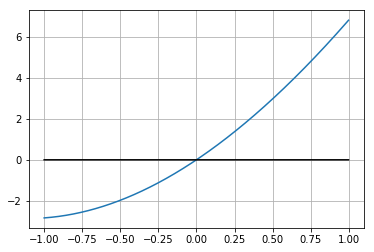

In [20]:
x = np.arange(-0.999, 0.999, 0.001)
y = f(x)
plt.plot(x,y)
plt.plot(x, x*0, 'k')
plt.grid(True)
plt.show()

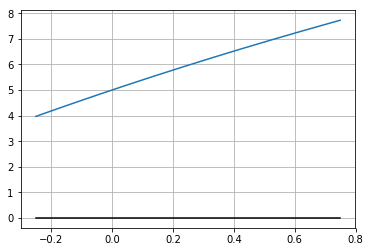

In [21]:
x1 = np.arange(-0.25, 0.75, 0.001)
y1 = d_f(x1)
plt.plot(x1, y1)
plt.plot(x1,x1*0,'k')
plt.grid(True)
plt.show()

In [22]:
m1 = -d_f(-0.25)
M1 = -d_f(0.75)
a1 = 2/(m1+M1)
q1 = (M1-m1)/(M1+m1)
m1, M1, a1, q1

(-3.9689124217106446,
 -7.731688868873821,
 -0.1709313863732294,
 0.32158829736306815)

In [23]:
print ('x = %.5f, количество итераций = %d'
%simple_first(0.25, p1, 10**(-5), q1, -a1))

x = 0.00000, количество итераций = 5


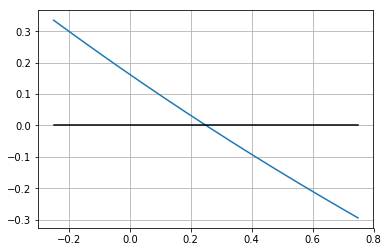

In [24]:
x3 = np.arange(-0.25, 0.75, 0.001)
y3 = d_p2(x3, 0.25)
plt.plot(x3, y3)
plt.plot(x3, x3*0, 'k')
plt.grid(True)
plt.show()

In [25]:
q3=np.amax(abs(y3))
q3

0.3350694161176544